<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章 区間推定（母分散未知）


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN    # 小数の四捨五入を行うためにimport

## 推定量
母数の推定に使う標本統計量を**推定量**といいます。 

第4章では、標本平均は母平均の推定量であることを述べました。  
他の標本統計量は推定量として使えるのでしょうか？


|  母数  |  推定量  |
| ---- | ---- |
|  母平均  |  標本平均  |
|  母比率  |  標本比率  |
|  母分散  |  標本分散？  |
|  母標準偏差  |  標本標準偏差？  |



標本平均と同様、標本比率も推定量として扱うことができます。  
（比率については次章で述べます）  

しかし、標本分散と標本標準偏差は推定量としては扱うことができません。  
第4章では母分散は既知であるものとして区間推定を行いましたが、母分散を推定するためにはどうすればよいのでしょうか？

## 不偏性
ある試行を永遠に繰り返した時に得られる実現値の平均のことを**期待値**と呼びます。

無限に標本を取ってそれぞれの標本統計量を計算したとき、その標本統計量の期待値が母数と一致する場合、  
その推定量には「**不偏性**がある」といいます。  
また、不偏性がある推定量を**不偏推定量**といいます。

例えば、標本平均は母平均の不偏推定量であるといえます。  
不偏推定量の方が、不偏性がない推定量よりも推定量として適しているといえます。

### 不偏分散
標本分散は母集団の分散より小さくなる傾向にあります。  
（標本は母集団の中から取ってくるので、ばらつきが小さくなるのは当然、という説明で大丈夫でしょうか）  
（図で確認したい方は[こちら](https://bit.ly/3GLkyIz)）  

もう少し数学的に理解したい人は[こちら](https://bit.ly/3VotpnD)を参考にしてください。



そのため、母分散の不偏推定量として**不偏分散**というものを使います。  
式は以下の通りです。  

$$
s^2 = \frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2}（標本分散）
$$
$$
s^{'2} = \frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}（不偏分散）
$$

$n$ではなくて$n-1$で割ることで補正をかけています。  
なぜ$n-1$で割るかは[こちら](https://bit.ly/3tWRJRW)が参考になると思います。

実際にPythonを使って確認してみましょう。

In [ ]:
samples = np.arange(21)
df = pd.DataFrame({'sample':samples})

In [ ]:
print(np.var(samples))    # NumPyの関数で標本分散を計算
print(df['sample'].var())    # Pandasの関数で不偏分散を計算
print(stats.tvar(samples))    # statsモジュールの関数で不偏分散を計算

36.666666666666664
38.5
38.5


### 不偏分散の平方根
母分散の推定量（不偏推定量とまでいえます）が**不偏分散**であることが確認できました。  

同様にして、母標準偏差の推定量は**不偏分散の平方根**をとることで表すことができます。

$$
s^{'} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}{(x_i-\bar{x})^2}}（不偏分散の平方根）$$

しかし注意しなければならないのは、**不偏性はない**ことです。  
そのため、不偏分散の平方根を**不偏標準偏差**と呼ぶのは間違いになりますので注意してください。  
（[こちら](https://bellcurve.jp/statistics/blog/13645.html)はかなり参考になる記事です）

実際にPythonを使って確認してみましょう。

In [ ]:
samples = np.arange(21)
df = pd.DataFrame({'sample':samples})

In [ ]:
print(np.std(samples,ddof=1))    # NumPyの関数で不偏分散の平方根を計算
print(stats.tstd(samples))    # statsモジュールの関数で不偏分散の平方根を計算

6.2048368229954285
6.2048368229954285


## 平均値の区間推定（母分散未知）
不偏分散の平方根を使って、母分散が未知の場合を想定し区間推定をしてみましょう。

### 区間推定のステップ（再掲）
①母集団から無作為抽出して標本を作成  
②標本から**推定量**を計算  
③**信頼区間**を設けて母数を推定  
④推定量の標本分布（標本統計量が従う分布）を考える  
⑤信頼区間がとりうる値を標本分布から算出する


### ① 母集団から無作為抽出して標本を作成
母集団の平均を$μ$とし、標本の大きさを$n$とします。

### ② 標本から推定量を計算
今回は標本平均が推定量となります。これを$\bar{x}$とします。  
加えて不偏分散の平方根も推定量となります。これを$s^{'}$とします。

### ③ 信頼区間を設けて母数を推定
信頼区間は95%とすることが多いです。

### ④ 推定量の標本分布を考える









標本平均の標本分布の平均と標準偏差が分かったところで、**標準化**して分かりやすくしましょう。  
標準化の式は以下の通りです。

$$
t=\frac{\bar{x}-μ}{\frac{s^{'}}{\sqrt{n}}}
$$

### ⑤ 信頼区間がとりうる値を標本分布から算出する
あとは$μ$に対して計算して値を出していくだけです。

$$
\bar{x}-t\frac{s^{'}}{\sqrt{n}} < μ < \bar{x}+t\frac{s^{'}}{\sqrt{n}}
$$

## t分布
不偏分散の平方根は母標準偏差と全く同じ値になる訳ではないので、  
標準化後の平均が従う分布が標準正規分布と多少異なります。



この確率分布を**t分布**といいます。  
標準正規分布と形がよく似ており、、その形はパラメータである「**自由度**」によって変わります。

t分布の自由度$m$は、標本サイズ$n$から1を引いたものです。

### Pythonによるt分布
Pythonを使って標準正規分布との違いを見てみましょう。

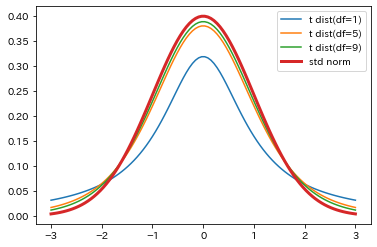

In [ ]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x, loc=0, scale=1)
for df in range(1, 10, 4):
    t2 = stats.t.pdf(x, df)    # 自由度を1,5,9としたt分布のy軸の値
    plt.plot(x, t2, label=f"t dist(df={df})")    # t分布描画
plt.plot(x, z, label='std norm', linewidth=3)    # 標準正規分布描画
plt.legend()    # 凡例表示

t分布の形は標準正規分布に似ていてベル型です。  
また、自由度が大きくなるにつれて標準正規分布に近似していくことが分かります。

### t分布か正規分布か
先ほどのPythonによるグラフ表示により、大標本であれば標準正規分布に近似できることが明らかとなりました。  

実際にはある程度標本が大きい場合($n$>30くらい）であれば正規分布を、  
小標本の場合やt分布表が使えそうな場合はt分布を使うことが多いです。


実際に手計算を行う際は、データを標準化した後に**t分布表**を用いることで、確率を求めることができます。  


### t分布表

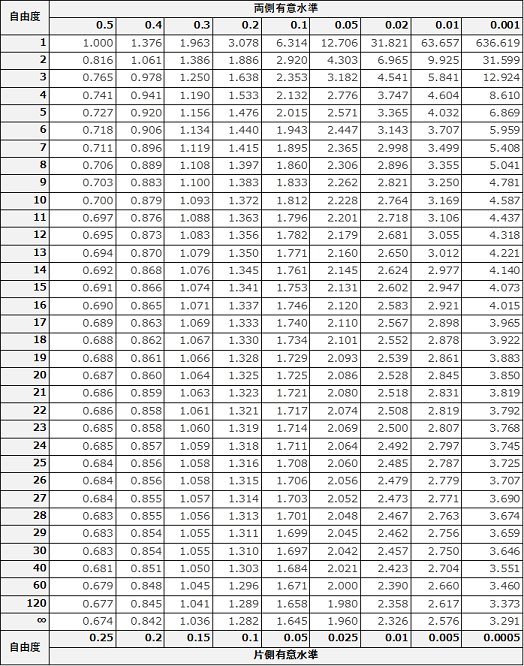

### t分布表の使い方

t分布の有意水準の表し方には**両側有意水準**と**片側有意水準**の2通りあります。  
  （例：95%信頼係数に対応する自由度5のt分布）

##### 両側有意水準
①自由度が「5」の行を見る。  
②「両側有意水準」の欄で$(1-0.95)=0.05$ のt値を読み取る。  
　（例：2.571）


通常は両側有意水準。


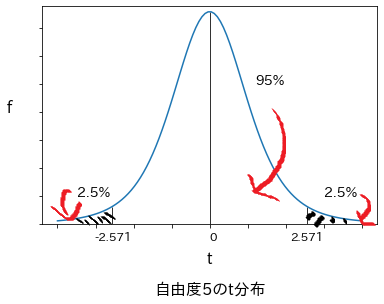

##### 片側有意水準
①自由度が「5」の行を見る。  
②「片側有意水準」の欄で$(1-0.95)=0.05$ のt値を読み取る。  
　（例：2.015）


特殊な場合は片側有意水準を用いる。

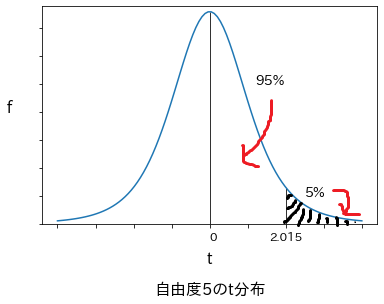

## Pythonによる区間推定
[こちら](https://bit.ly/3i75LxB)の演習問題の区間推定を行ってみましょう。  

手計算で行いたい方はこの後少し解説を入れるので参考にしてください。 
Pythonでは簡単に区間推定ができますので紹介します。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "部品Aの重さ" : [100.2,101.5,98.0,100.1,100.9,99.6,98.6,102.1,101.4,97.9]
}

df = pd.DataFrame(data)
df

,部品Aの重さ
0,100.2
1,101.5
2,98.0
3,100.1
4,100.9
5,99.6
6,98.6
7,102.1
8,101.4
9,97.9


In [ ]:
# 平均を求める
print(df["部品Aの重さ"].mean())

# 不偏分散を求める
print(stats.tvar(df))

# 普遍分散の平方根を求める（不偏標準偏差とはいいません）
print(np.sqrt(stats.tvar(df)))

x = df["部品Aの重さ"].mean()
s = np.sqrt(stats.tvar(df))
s = float(Decimal(str(s[0])).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))    # 四捨五入
s

100.03
[2.22233333]
[1.49074925]


1.49

In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.95, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.90,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入

print("部品Aの重さの平均は信頼係数90%のもとで")
print("{} g≦ μ ≦ {}g".format(x1,x2))

t:1.833
部品Aの重さの平均は信頼係数90%のもとで
99.17 g≦ μ ≦ 100.89g


In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.975, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.95,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入

print("部品Aの重さの平均は信頼係数95%のもとで")
print("{} g≦ μ ≦ {}g".format(x1,x2))

t:2.262
部品Aの重さの平均は信頼係数95%のもとで
98.96 g≦ μ ≦ 101.10g


In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.995, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.99,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)    # 四捨五入

print("部品Aの重さの平均は信頼係数99%のもとで")
print("{} g≦ μ ≦ {}g".format(x1,x2))

t:3.25
部品Aの重さの平均は信頼係数99%のもとで
98.50 g≦ μ ≦ 101.56g


### 関数電卓の使い方（手計算）
色々なモデルがあると思いますが、関数電卓で平均・不偏分散の平方根を計算するための方法の一例を紹介します。

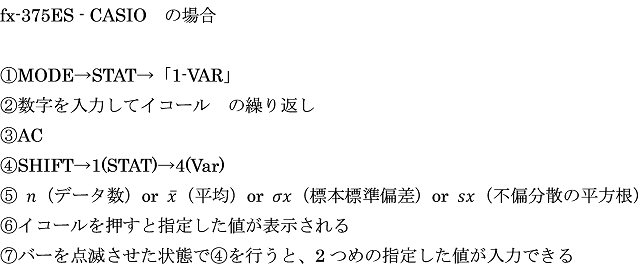

### 演習
演習をして第5章は終了です。

まずは[こちら](https://bit.ly/3EZSekD)の問題を区間推定してみましょう。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "化学の点数" : [80,95,60,70,100]
}

df = pd.DataFrame(data)
df

,化学の点数
0,80
1,95
2,60
3,70
4,100


In [ ]:
# 平均を求める
print(df["化学の点数"].mean())

# 不偏分散を求める
print(stats.tvar(df))

# 普遍分散の平方根を求める（不偏標準偏差とはいいません）
print(np.sqrt(stats.tvar(df)))

x = df["化学の点数"].mean()
s = np.sqrt(stats.tvar(df))
s = float(Decimal(str(s[0])).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))    # 四捨五入
s

81.0
[280.]
[16.73320053]


16.73

In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.975, 4))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.95,loc=x,scale=s/np.sqrt(5),df=5-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)    # 四捨五入

print("化学の点数の平均は信頼係数95%のもとで")
print("{} 点≦ μ ≦ {}点".format(x1,x2))

t:2.776
化学の点数の平均は信頼係数95%のもとで
60.2 点≦ μ ≦ 101.8点


次に、いい問題が全然なかったので、私の方で創作問題を作りました。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "都道府県":["秋田県","青森県","島根県","沖縄県","北海道","高知県","東京都","大阪府","石川県","愛知県"],
    "運転免許保有者割合（%）" : [68.1,66.4,67.3,65.7,63.4,67.8,57.6,57.9,68.7,68.1]
    
}

df = pd.DataFrame(data)
df

,都道府県,運転免許保有者割合（%）
0,秋田県,68.1
1,青森県,66.4
2,島根県,67.3
3,沖縄県,65.7
4,北海道,63.4
5,高知県,67.8
6,東京都,57.6
7,大阪府,57.9
8,石川県,68.7
9,愛知県,68.1


＜問題＞  
上のデータフレームは2021年の運転免許保有者割合を都道府県別に表したものの一部である。  
運転免許保有者割合の平均を信頼係数95%で区間推定せよ。

In [ ]:
# 平均を求める
print(df["運転免許保有者割合（%）"].mean())

# 不偏分散を求める
print(stats.tvar(df["運転免許保有者割合（%）"]))

# 普遍分散の平方根を求める（不偏標準偏差とはいいません）
print(np.sqrt(stats.tvar(df["運転免許保有者割合（%）"])))

x = df["運転免許保有者割合（%）"].mean()
s = np.sqrt(stats.tvar(df["運転免許保有者割合（%）"]))
s = float(Decimal(str(s)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))    # 四捨五入
s

65.10000000000001
17.34666666666666
4.16493297264994


4.16

In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.975, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.95,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)    # 四捨五入

print("運転免許保有者割合の平均は信頼係数95%のもとで")
print("{}% ≦ μ ≦ {}%".format(x1,x2))

t:2.262
運転免許保有者割合の平均は信頼係数95%のもとで
62.1% ≦ μ ≦ 68.1%


In [ ]:
# 実際の母平均は67.5%なので、ある程度推定できていることが分かります
# 東京や大阪などの都心部は、割合が有意な値であることから交通インフラの充実さが伺えます
# 標本にはないですが、北関東の県の内3件が70%超えであることも特徴的です

最後も引き続き、私の方で創作問題を作りました。

In [ ]:
# dictionaryからDataFrameを作る

data = {
    "都道府県":["秋田県","青森県","島根県","沖縄県","北海道","高知県","東京都","大阪府","石川県","愛知県"],
    "15歳以上の平均睡眠時間（男）" : [487,486,480,465,473,478,455,460,467,457],
    "15歳以上の平均睡眠時間（女）" : [475,470,461,449,465,464,452,448,451,448]
    
}

df = pd.DataFrame(data)
df

,都道府県,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）
0,秋田県,487,475
1,青森県,486,470
2,島根県,480,461
3,沖縄県,465,449
4,北海道,473,465
5,高知県,478,464
6,東京都,455,452
7,大阪府,460,448
8,石川県,467,451
9,愛知県,457,448


＜問題＞  
上のデータフレームは2016年の15歳以上の平均睡眠時間を都道府県別に表したものの一部である。  
男女それぞれの平均睡眠時間を信頼係数95%で区間推定せよ。

＜男性＞

In [ ]:
# 平均を求める
print(df["15歳以上の平均睡眠時間（男）"].mean())

# 不偏分散を求める
print(stats.tvar(df["15歳以上の平均睡眠時間（男）"]))

# 普遍分散の平方根を求める（不偏標準偏差とはいいません）
print(np.sqrt(stats.tvar(df["15歳以上の平均睡眠時間（男）"])))

x = df["15歳以上の平均睡眠時間（男）"].mean()
s = np.sqrt(stats.tvar(df["15歳以上の平均睡眠時間（男）"]))
s = float(Decimal(str(s)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))    # 四捨五入
s

470.8
137.73333333333335
11.735984548955974


11.74

In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.975, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.95,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('1'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('1'), rounding=ROUND_HALF_UP)    # 四捨五入

print("睡眠時間の平均は信頼係数95%のもとで")
print("{}分 ≦ μ ≦ {}分".format(x1,x2))

t:2.262
睡眠時間の平均は信頼係数95%のもとで
462分 ≦ μ ≦ 479分


In [ ]:
# 実際の母平均は468時間なので、ある程度推定できていることが分かります
# 通勤時間と負の相関が、農業就業人口と正の相関があるようです
# 三大都市圏の睡眠時間は有意な値となっています

＜女性＞

In [ ]:
# 平均を求める
print(df["15歳以上の平均睡眠時間（女）"].mean())

# 不偏分散を求める
print(stats.tvar(df["15歳以上の平均睡眠時間（女）"]))

# 普遍分散の平方根を求める（不偏標準偏差とはいいません）
print(np.sqrt(stats.tvar(df["15歳以上の平均睡眠時間（女）"])))

x = df["15歳以上の平均睡眠時間（女）"].mean()
s = np.sqrt(stats.tvar(df["15歳以上の平均睡眠時間（女）"]))
s = float(Decimal(str(s)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))    # 四捨五入
s

458.3
99.12222222222222
9.95601437434791


9.96

In [ ]:
# Pythonによる導出方法
t2 = float(Decimal(str(t.ppf(0.975, 9))).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"t:{t2}")
x1,x2 = stats.t.interval(alpha=0.95,loc=x,scale=s/np.sqrt(10),df=10-1)    # 下方信頼限界 , 上方信頼限界
x1 = Decimal(str(x1)).quantize(Decimal('1'), rounding=ROUND_HALF_UP)    # 四捨五入
x2 = Decimal(str(x2)).quantize(Decimal('1'), rounding=ROUND_HALF_UP)    # 四捨五入

print("睡眠時間の平均は信頼係数95%のもとで")
print("{}分 ≦ μ ≦ {}分".format(x1,x2))

t:2.262
睡眠時間の平均は信頼係数95%のもとで
451分 ≦ μ ≦ 465分


In [ ]:
# 実際の母平均は454時間なので、ある程度推定できていることが分かります
# 通勤時間と負の相関が、農業就業人口と正の相関があるようです
# 三大都市圏の睡眠時間はほぼ有意な値となっています

第5章は終了です。お疲れさまでしたー

## 補足
最後に、有名Youtuberヨビノリ先生の動画で参考になりそうなものを紹介しておきます。

①[区間推定（母分散未知）](https://bit.ly/3V2sgm4)  